In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [19]:
# Load the dataset
data = pd.read_csv("canada_per_capita_income.csv")

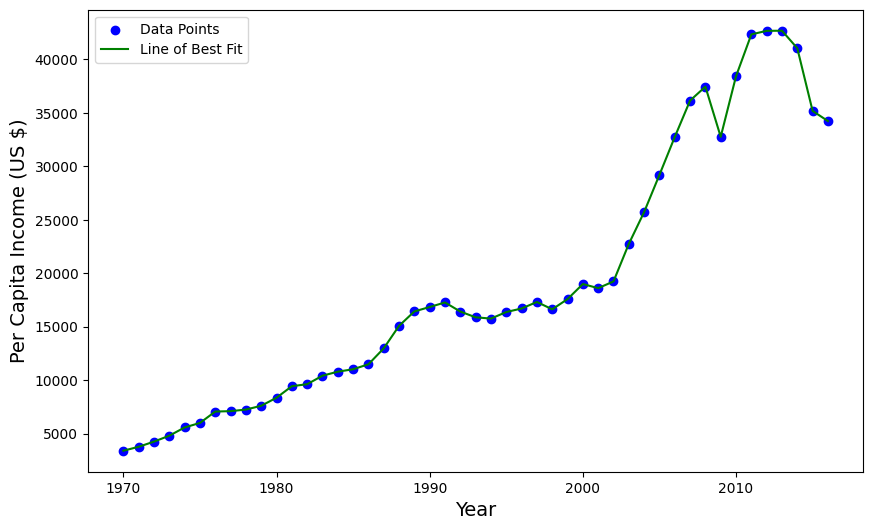

In [20]:
# Visualize the data
plt.figure(figsize=(10, 6))
plt.xlabel("Year", fontsize=14)
plt.ylabel("Per Capita Income (US $)", fontsize=14)
plt.scatter(data.year, data.per_capita_income, color="blue", label="Data Points")
plt.plot(data.year, data.per_capita_income, color="green", label="Line of Best Fit")
plt.legend()
plt.show()

In [21]:
# Create and train the linear regression model
X = data[['year']].values
y = data['per_capita_income'].values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [22]:
# Get the model coefficients
coefficient = model.coef_[0]
intercept = model.intercept_

In [23]:
print(f"Coefficient: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")

Coefficient: 828.47
Intercept: -1632210.76


In [24]:
def calculate_income(year, coefficient, intercept):
    """
    Calculate the predicted per capita income for a given year using the linear regression model.

    Args:
        year (int): The year for which to calculate the per capita income.
        coefficient (float): The coefficient of the linear regression model.
        intercept (float): The intercept of the linear regression model.

    Returns:
        float: The predicted per capita income for the given year.
    """
    return coefficient * year + intercept

In [25]:
# Generate test data
test_years = [2018, 2019, 2020, 2021, 2025, 2030]
expected_income = [calculate_income(year, coefficient, intercept) for year in test_years]

In [26]:
# Create a DataFrame for the test data
test_data = pd.DataFrame({"year": test_years, "expected_income": expected_income})

In [27]:
# Save the test data to a CSV file
test_data.to_csv("test_data.csv", index=False)

In [28]:
# Make predictions using the model
model_predictions = model.predict(np.array(test_years).reshape(-1, 1))

In [29]:
# Compare the model predictions with the expected income
print("\nComparison of Model Predictions and Expected Income:")
for i, (predicted, expected) in enumerate(zip(model_predictions, expected_income), start=1):
    if np.isclose(predicted, expected):
        print(f"Test {i}: The predicted value matches the expected value --> Pass")
    else:
        print(f"Test {i}: The predicted value does not match the expected value --> Fail")


Comparison of Model Predictions and Expected Income:
Test 1: The predicted value matches the expected value --> Pass
Test 2: The predicted value matches the expected value --> Pass
Test 3: The predicted value matches the expected value --> Pass
Test 4: The predicted value matches the expected value --> Pass
Test 5: The predicted value matches the expected value --> Pass
Test 6: The predicted value matches the expected value --> Pass
